## Accessing ICESat-2 Data
Adapted from Jessica Scheick
source material: NSIDC Data Access Notebook by Amy Steiker and Bruce Wallin

In [5]:
import icepyx as ipx
import os
import shutil
%matplotlib inline

In [1]:
short_name = 'ATL03'

#bounding box
short_name = 'ATL06'
spatial_extent = [-55, 68, -48, 71]
date_range = ['2019-02-20','2019-02-28']

In [8]:
#polygon vertices (here equivalent to the bounding box, above)
#short_name = 'ATL03'
#spatial_extent = [(-55, 68), (-55, 71), (-48, 71), (-48, 68), (-55, 68)]
#date_range = ['2019-02-20','2019-02-28']

In [3]:
#theoretically this works, but it hasn't for me yet CEB

#polygon geospatial file (metadata match but no subset match)
#short_name = 'ATL06'
#spatial_extent = './supporting_files/data-access_PineIsland/glims_polygons.kml'
#date_range = ['2019-02-22','2019-02-28']

#polygon geospatial file (subset and metadata match)
#short_name = 'ATL03'
#spatial_extent = 'glims_polygons.shp'
#date_range = ['2018-10-01','2020-08-05']

In [9]:
region_a = ipx.Query(short_name, spatial_extent, date_range)
#region_a = ipx.Query(short_name, spatial_extent, date_range, \
    #tracks=['1024'])

ATL03
['2019-02-20', '2019-02-28']
00:00:00
23:59:59
003
['02']
['0841', '0849', '0902', '0910']


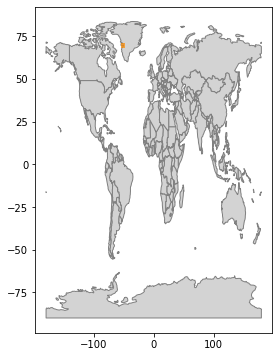

In [10]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.cycles)
print(region_a.tracks)
# print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [7]:
region_a.dataset_summary_info()
print(region_a.latest_version())

dataset_id :  ATLAS/ICESat-2 L2A Global Geolocated Photon Data V003
short_name :  ATL03
version_id :  003
time_start :  2018-10-13T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL03) contains height above the WGS 84 ellipsoid (ITRF2014 reference frame), latitude, longitude, and time for all photons downlinked by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory. The ATL03 product was designed to be a single source for all photon data and ancillary information needed by higher-level ATLAS/ICESat-2 products. As such, it also includes spacecraft and instrument parameters and ancillary data not explicitly required for ATL03.
orbit_parameters :  {'swath_width': '36.0', 'period': '96.8', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}
003


In [8]:
region_a.dataset_all_info()

{'feed': {'entry': [{'archive_center': 'NASA NSIDC DAAC',
                     'associations': {'services': ['S1568899363-NSIDC_ECS',
                                                   'S1613669681-NSIDC_ECS',
                                                   'S1613689509-NSIDC_ECS']},
                     'boxes': ['-90 -180 90 180'],
                     'browse_flag': False,
                     'coordinate_system': 'CARTESIAN',
                     'data_center': 'NSIDC_ECS',
                     'dataset_id': 'ATLAS/ICESat-2 L2A Global Geolocated '
                                   'Photon Data V002',
                     'has_formats': True,
                     'has_spatial_subsetting': True,
                     'has_temporal_subsetting': True,
                     'has_transforms': False,
                     'has_variables': True,
                     'id': 'C1631076758-NSIDC_ECS',
                     'links': [{'href': 'https://n5eil01u.ecs.nsidc.org/ATLAS/ATL03.002/',
  

In [9]:
#build and view the parameters that will be submitted in our query
region_a.CMRparams

{'short_name': 'ATL03',
 'version': '003',
 'temporal': '2018-01-01T00:00:00Z,2020-12-31T23:59:59Z',
 'bounding_box': '-52.2025,63.9394,-50.4722,64.2538'}

In [10]:
region_a.avail_granules()

{'Number of available granules': 137,
 'Average size of granules (MB)': 2568.7016336830834,
 'Total size of all granules (MB)': 351912.1238145823}

In [11]:
#get a list of granule IDs for the available granules
region_a.avail_granules(ids=True)

[['ATL03_20181017070423_02850105_003_01.h5',
  'ATL03_20181021065603_03460105_003_01.h5',
  'ATL03_20181101174616_05210103_003_01.h5',
  'ATL03_20181105173801_05820103_003_01.h5',
  'ATL03_20181109172947_06430103_003_01.h5',
  'ATL03_20181111054901_06660105_003_01.h5',
  'ATL03_20181115054039_07270105_003_01.h5',
  'ATL03_20181119053215_07880105_003_01.h5',
  'ATL03_20181130162211_09630103_003_01.h5',
  'ATL03_20181204161353_10240103_003_01.h5',
  'ATL03_20181208160534_10850103_003_01.h5',
  'ATL03_20181210042448_11080105_003_01.h5',
  'ATL03_20181214041627_11690105_003_01.h5',
  'ATL03_20181218040809_12300105_003_01.h5',
  'ATL03_20181229145819_00180203_003_01.h5',
  'ATL03_20190102145002_00790203_003_01.h5',
  'ATL03_20190106144141_01400203_003_01.h5',
  'ATL03_20190108030055_01630205_003_01.h5',
  'ATL03_20190110143319_02010203_003_01.h5',
  'ATL03_20190112025232_02240205_003_01.h5',
  'ATL03_20190116024407_02850205_003_01.h5',
  'ATL03_20190120023550_03460205_003_01.h5',
  'ATL03_2

In [12]:
#print detailed information about the returned search results
region_a.granules.avail

[{'producer_granule_id': 'ATL03_20181017070423_02850105_003_01.h5',
  'time_start': '2018-10-17T07:04:20.922Z',
  'orbit': {'ascending_crossing': '131.98482756663196',
   'start_lat': '80',
   'start_direction': 'D',
   'end_lat': '59.5',
   'end_direction': 'D'},
  'updated': '2020-05-04T16:29:46.862Z',
  'orbit_calculated_spatial_domains': [{'equator_crossing_date_time': '2018-10-17T06:38:14.406Z',
    'equator_crossing_longitude': '131.98482756663196',
    'orbit_number': '486'}],
  'dataset_id': 'ATLAS/ICESat-2 L2A Global Geolocated Photon Data V003',
  'data_center': 'NSIDC_ECS',
  'title': 'SC:ATL03.003:176303960',
  'coordinate_system': 'ORBIT',
  'time_end': '2018-10-17T07:09:46.348Z',
  'id': 'G1711066818-NSIDC_ECS',
  'original_format': 'ISO-SMAP',
  'granule_size': '1344.5416269302',
  'browse_flag': True,
  'polygons': [['82.61181287249774 -37.60397462611548 64.25279895559643 -51.26375217344079 62.64689994932401 -51.674251522364344 62.67151494025864 -52.377527588199484 64.2

## Login to Earthdata

In [13]:
earthdata_uid = 'caseyebrayton'
email = 'caseyebrayton@gmail.com'
region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password: ········


## Subsetting Parameters

In [14]:
print(region_a.reqparams)
# region_a.reqparams['page_size'] = 9
# print(region_a.reqparams)

{'page_size': 10, 'page_num': 14}


In [15]:
region_a.subsetparams()

{'time': '2018-01-01T00:00:00,2020-12-31T23:59:59',
 'bbox': '-52.2025,63.9394,-50.4722,64.2538'}

In [16]:
region_a.show_custom_options(dictview=True)

Subsetting options
[{'id': 'ICESAT2',
  'maxGransAsyncRequest': '2000',
  'maxGransSyncRequest': '100',
  'spatialSubsetting': 'true',
  'spatialSubsettingShapefile': 'true',
  'temporalSubsetting': 'true',
  'type': 'both'}]
Data File Formats (Reformatting Options)
['TABULAR_ASCII', 'NetCDF4-CF', 'NetCDF-3']
Reprojection Options
[]
Data File (Reformatting) Options Supporting Reprojection
['TABULAR_ASCII', 'NetCDF4-CF', 'NetCDF-3', 'No reformatting']
Data File (Reformatting) Options NOT Supporting Reprojection
[]
Data Variables (also Subsettable)
{'addpad_flag': ['ancillary_data/gt1l/signal_find_input/addpad_flag',
                 'ancillary_data/gt1r/signal_find_input/addpad_flag',
                 'ancillary_data/gt2l/signal_find_input/addpad_flag',
                 'ancillary_data/gt2r/signal_find_input/addpad_flag',
                 'ancillary_data/gt3l/signal_find_input/addpad_flag',
                 'ancillary_data/gt3r/signal_find_input/addpad_flag'],
 'alpha_inc': ['ancillary_

## Modifying your wanted variable list
Generating and modifying your variable request list, which is stored in region_a.order_vars.wanted, is controlled by the append and remove functions that operate on region_a.order_vars.wanted. The input options to append are as follows (the full documentation for this function can be found by executing help(region_a.order_vars.append)).

defaults (default False) - include the default variable list for your dataset (not yet fully implemented for all datasets; please submit your default variable list for inclusion!)
var_list (default None) - list of variables (entered as strings)
beam_list (default None) - list of beams/profiles (entered as strings)
keyword_list (default None) - list of keywords (entered as strings); use keyword_list=[''] to obtain a list of available keywords
Similarly, the options for remove are:

all (default False) - reset region_a.order_vars.wanted to None
var_list (as above)
beam_list (as above)
keyword_list (as above)

In [17]:
region_a.order_vars.avail()

['ds_surf_type',
 'ds_xyz',
 'ancillary_data/atlas_sdp_gps_epoch',
 'ancillary_data/control',
 'ancillary_data/data_end_utc',
 'ancillary_data/data_start_utc',
 'ancillary_data/end_cycle',
 'ancillary_data/end_delta_time',
 'ancillary_data/end_geoseg',
 'ancillary_data/end_gpssow',
 'ancillary_data/end_gpsweek',
 'ancillary_data/end_orbit',
 'ancillary_data/end_region',
 'ancillary_data/end_rgt',
 'ancillary_data/granule_end_utc',
 'ancillary_data/granule_start_utc',
 'ancillary_data/release',
 'ancillary_data/start_cycle',
 'ancillary_data/start_delta_time',
 'ancillary_data/start_geoseg',
 'ancillary_data/start_gpssow',
 'ancillary_data/start_gpsweek',
 'ancillary_data/start_orbit',
 'ancillary_data/start_region',
 'ancillary_data/start_rgt',
 'ancillary_data/version',
 'ancillary_data/altimetry/atl03_pad',
 'ancillary_data/altimetry/band_tol',
 'ancillary_data/altimetry/min_full_sat',
 'ancillary_data/altimetry/min_near_sat',
 'ancillary_data/altimetry/min_sat_h',
 'ancillary_data/a

In [18]:
#region_a.order_vars.avail(options=True)

In [19]:
#pprint(region_a.order_vars.wanted)

In [20]:
#region_a.order_vars.append(keyword_list=[''])

## Order 

In [21]:
#region_a.subsetparams(Coverage=region_a.order_vars.wanted)

In [22]:
region_a.order_granules()
# region_a.order_granules(verbose=True)

Total number of data order requests is  14  for  137  granules.
Data request  1  of  14  is submitting to NSIDC
order ID:  5000000864970
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
Data request  2  of  14  is submitting to NSIDC
order ID:  5000000864991
Initial status of your order request at NSIDC is:  pending
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order s

Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
Data request  11  of  14  is submitting to NSIDC
order ID:  5000000865173
Initial status of your order request at NSIDC is:  pending
Your order status is still  pending  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments

In [23]:
#view a short list of order IDs
region_a.granules.orderIDs

['5000000864970',
 '5000000864991',
 '5000000865008',
 '5000000865029',
 '5000000865056',
 '5000000865080',
 '5000000865117',
 '5000000865135',
 '5000000865155',
 '5000000865162',
 '5000000865173',
 '5000000865190',
 '5000000865217',
 '5000000865241']

In [24]:
path = './download'
region_a.download_granules(path)

Beginning download of zipped output...
Data request 5000000864970 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000864991 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865008 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865029 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865056 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865080 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865117 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865135 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865155 of  14  order(s) is downloaded.
Beginning download of zipped output...
Data request 5000000865162 of  14  order(s) is downloaded.
Beginning download o